**AAJoseph**  
Example - Python Coding  
**<span style='color:blue '>BLUE</span>** text indicates notes.

Credits: [AAprillant, k-prototype as clustering for mized data](https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb)

K-Prototypes is a clustering method based on partitioning. Its algorithm is an improvement of the K-Means and K-Mode clustering algorithm, offering an advantage of handling mixed data types. 

## Imports

In [1]:
# data processing 
import pandas as pd
import numpy as np
import os

# analysis
from sklearn.preprocessing import PowerTransformer

# modeling
from kmodes.kprototypes import KPrototypes

# visuals 
import plotnine
from plotnine import *

# random number generator
import random

#### Data

In [2]:
# read data
ex_raw = pd.read_csv(r'V:/My Drive/VCU _ MDA/GROUP 1 - Practicums/Example/Data/Practicum_Data_Grp1.txt', index_col=0)

In [3]:
# Create working copy and remove rows where product revenue LE $0
posRev = ex_raw[ex_raw['PRODUCT_REVENUE']>1.0]

# Drop rows with FEI Internal business group
noFEI = posRev[posRev['BUSINESS_GROUP'] != ('FEI Internal')]

# Drop rows of unwanted Customer Type IDs 
custOnly = noFEI[(noFEI['CUSTOMER_TYPE_ID'] != ('O_BRCHACCT')) | 
             (noFEI['CUSTOMER_TYPE_ID'] != ('O_EXPORTER')) | 
             (noFEI['CUSTOMER_TYPE_ID'] != ('O_INTRBRNCH')) | 
             (noFEI['CUSTOMER_TYPE_ID'] != ('O_OTHER')) | 
             (noFEI['CUSTOMER_TYPE_ID'] != ('E_EMPLOY')) | 
             (noFEI['CUSTOMER_TYPE_ID'] != ('E_ENDUSER')) | 
             (noFEI['CUSTOMER_TYPE_ID'] != ('E_ETAILER')) | 
             (noFEI['CUSTOMER_TYPE_ID'] != ('E_HMEOWNR_NSC'))] 

# Only keep central cluster of clusters
ex = custOnly[custOnly['MCA'] == ('Multi_RESB_H_W_F_plus')]
ex2_raw = ex

In [4]:
ex.head()

,ORD_CHNL_ID,FFMT_CHNL_ID,BUSINESS_GROUP,MCA,CUSTOMER_TYPE_ID,PRODUCT_REVENUE,PROD_REV_bins,PROD_REV_Std,COUNTER_FLAG,SHOWROOM_FLAG,REGION_NAME,LEVEL1,X_MCA_D1,Y_MCA_D2,MCA_GRP_ALL
locROW,,,,,,,,,,,,,,,
31890,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_PROD_BUILD,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended West,WATER WORKS,-0.048080,1.193475,GRPB1.6
39624,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended West,PLUMBING - ROUGH,-0.048239,1.185296,GRPB1.6
66057,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended West,PLUMBING - ROUGH,-0.048239,1.185296,GRPB1.6
108527,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended Central,"PIPE, VALVES AND FITTINGS",-0.048239,1.185296,GRPB1.6
127791,TRDL,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended West,"PIPE, VALVES AND FITTINGS",-0.048239,1.185296,GRPB1.6


In [5]:
ex.shape

(1074311, 15)

In [6]:
print('Dimension data: {} rows and {} columns'.format(len(ex), len(ex.columns)))
ex.head(10)

Dimension data: 1074311 rows and 15 columns


,ORD_CHNL_ID,FFMT_CHNL_ID,BUSINESS_GROUP,MCA,CUSTOMER_TYPE_ID,PRODUCT_REVENUE,PROD_REV_bins,PROD_REV_Std,COUNTER_FLAG,SHOWROOM_FLAG,REGION_NAME,LEVEL1,X_MCA_D1,Y_MCA_D2,MCA_GRP_ALL
locROW,,,,,,,,,,,,,,,
31890,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_PROD_BUILD,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended West,WATER WORKS,-0.048080,1.193475,GRPB1.6
39624,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended West,PLUMBING - ROUGH,-0.048239,1.185296,GRPB1.6
66057,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended West,PLUMBING - ROUGH,-0.048239,1.185296,GRPB1.6
108527,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended Central,"PIPE, VALVES AND FITTINGS",-0.048239,1.185296,GRPB1.6
127791,TRDL,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended West,"PIPE, VALVES AND FITTINGS",-0.048239,1.185296,GRPB1.6
132261,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended West,PLUMBING - ROUGH,-0.048239,1.185296,GRPB1.6
166638,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLNEW,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended West,"PIPE, VALVES AND FITTINGS",-0.048239,1.185296,GRPB1.6
264172,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLREMDL,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended West,PLUMBING - ROUGH,-0.048376,1.194069,GRPB1.6
267277,CTR,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLREMDL,1.01,0.01 — 5.575,0.166107,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended West,"PIPE, VALVES AND FITTINGS",-0.048376,1.194069,GRPB1.6


### NOTE: Value Types
May require positions of categorical vs. numeric

In [7]:
ex.dtypes

ORD_CHNL_ID          object
FFMT_CHNL_ID         object
BUSINESS_GROUP       object
MCA                  object
CUSTOMER_TYPE_ID     object
PRODUCT_REVENUE     float64
PROD_REV_bins        object
PROD_REV_Std        float64
COUNTER_FLAG         object
SHOWROOM_FLAG        object
REGION_NAME          object
LEVEL1               object
X_MCA_D1            float64
Y_MCA_D2            float64
MCA_GRP_ALL          object
dtype: object

In [8]:
# Check missing value
ex.isna().sum()

ORD_CHNL_ID           0
FFMT_CHNL_ID          0
BUSINESS_GROUP        0
MCA                   0
CUSTOMER_TYPE_ID    374
PRODUCT_REVENUE       0
PROD_REV_bins         0
PROD_REV_Std          0
COUNTER_FLAG          0
SHOWROOM_FLAG         0
REGION_NAME           0
LEVEL1                0
X_MCA_D1              0
Y_MCA_D2              0
MCA_GRP_ALL           0
dtype: int64

Not concerned about the rows missing CUSTOMER_TYPE_ID. This level of customer is not being used for clustering.

In [9]:
# Frequency tables for each categorical feature
for column in ex.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=ex[column], columns='% observations', normalize='columns')*100)

col_0,% observations
ORD_CHNL_ID,
CTR,43.595663
ECOMM,4.488737
SHWFOL,0.706220
SHWRM,15.126905
TRDL,36.082475


col_0,% observations
FFMT_CHNL_ID,
DLVR,36.274226
EX-DIR,3.483907
IN-DIR,4.303968
PKUP,55.937899


col_0,% observations
BUSINESS_GROUP,
Commercial,0.010518
Fire and Fabrication,6.597624
HVAC,29.479545
Industrial,8.191576
Other,0.581675
Residential Builder,38.088040
Unknown,0.032393
Waterworks,17.018629


col_0,% observations
MCA,
Multi_RESB_H_W_F_plus,100.0


col_0,% observations
CUSTOMER_TYPE_ID,
B_INDUS,0.000466
B_MULTI,0.950428
B_PREFAB,0.074678
B_PROD_BUILD,1.243090
B_SGLNEW,11.191159
...,...
U_UTLTYCON,0.000466
U_UTLTYPW,1.306129
U_UTLTYRES,1.608102


col_0,% observations
PROD_REV_bins,
0.01 — 5.575,4.017552
178.5 — 715.55,22.499630
37.25 — 178.5,29.985823
5.575 — 37.25,24.787887
715.55 — 2500000,18.709108


col_0,% observations
COUNTER_FLAG,
N_COUNTER_FLAG,13.842360
U_COUNTER_FLAG,0.500972
Y_COUNTER_FLAG,85.656667


col_0,% observations
SHOWROOM_FLAG,
N_SHOWROOM_FLAG,72.076708
U_SHOWROOM_FLAG,0.500972
Y_SHOWROOM_FLAG,27.422320


col_0,% observations
REGION_NAME,
Blended Central,25.440771
Blended East,29.937234
Blended Misc,0.316482
Blended West,21.959377
Distribution Center BUS,0.005864
Ebusiness,0.250300
Fire And Fabrication,6.269600
Missing Region,0.500972
Own Brand,0.003165


col_0,% observations
LEVEL1,
ACCOUNTING AND SERVICES,3.722665
BUILDER,6.152874
ELECTRICAL,1.979315
"HEATING, VENTILATION AND AIR CONDITIONING",16.912421
LEVEL1 UNK,0.001862
LIGHTING,1.751914
MRO AND CONSUMABLES,8.795125
"PIPE, VALVES AND FITTINGS",29.876358
PLUMBING - FINISHED,12.400599


col_0,% observations
MCA_GRP_ALL,
GRPB1.1,16.210948
GRPB1.2,0.034906
GRPB1.3,6.361007
GRPB1.4,8.373367
GRPB1.5,29.339735
GRPB1.6,39.680037


# **<span style='color:blue '>Reduced Customer Groupings</span>**

### Hierarchical Clustering (Agglomerative)

#### Use MCA plot points

In [10]:
# clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# plotting
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style='dark');

#### Example Sample Dataset

In [11]:
# ex sample
ex_sample = ex.sample(frac=.01, random_state=314)
print(len(ex_sample))

10743


In [12]:
ex_sample.head()

,ORD_CHNL_ID,FFMT_CHNL_ID,BUSINESS_GROUP,MCA,CUSTOMER_TYPE_ID,PRODUCT_REVENUE,PROD_REV_bins,PROD_REV_Std,COUNTER_FLAG,SHOWROOM_FLAG,REGION_NAME,LEVEL1,X_MCA_D1,Y_MCA_D2,MCA_GRP_ALL
locROW,,,,,,,,,,,,,,,
3671792,CTR,PKUP,Waterworks,Multi_RESB_H_W_F_plus,U_UTLTYRES,14.00,5.575 — 37.25,0.166112,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Waterworks,MRO AND CONSUMABLES,-0.042204,0.617152,GRPB1.1
797473,SHWRM,EX-DIR,Residential Builder,Multi_RESB_H_W_F_plus,E_ENDUSER,1114.04,715.55 — 2500000,0.166540,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended West,PLUMBING - FINISHED,-0.045826,1.164083,GRPB1.6
1268014,CTR,PKUP,HVAC,Multi_RESB_H_W_F_plus,H_HVACRNC,98.60,37.25 — 178.5,0.166145,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended West,PLUMBING - ROUGH,-0.284433,0.464878,GRPB1.5
290939,SHWRM,PKUP,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLREMDL,41.58,37.25 — 178.5,0.166123,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended East,PLUMBING - FINISHED,-0.048376,1.194069,GRPB1.6
234380,SHWRM,DLVR,Residential Builder,Multi_RESB_H_W_F_plus,B_SGLREMDL,142.16,37.25 — 178.5,0.166162,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended East,WATER SYSTEMS,-0.048376,1.194069,GRPB1.6


In [13]:
#keep needed columns
mca_xy = ex2_raw[['X_MCA_D1', 'Y_MCA_D2']]
#dim after drop
print('Dimension data: {} rows and {} columns'.format(len(mca_xy), len(mca_xy.columns)))

Dimension data: 1074311 rows and 2 columns


#### MCA Sample

In [14]:
# Use the ex sample data set
mca_sample = ex_sample[['X_MCA_D1', 'Y_MCA_D2']]
print(len(mca_sample))

10743


#### Convert data structure

In [15]:
#array
mca = mca_xy.to_numpy()
mca_s = mca_sample.to_numpy()

#### Visualize overlay of sample on raw data to visualize fit.

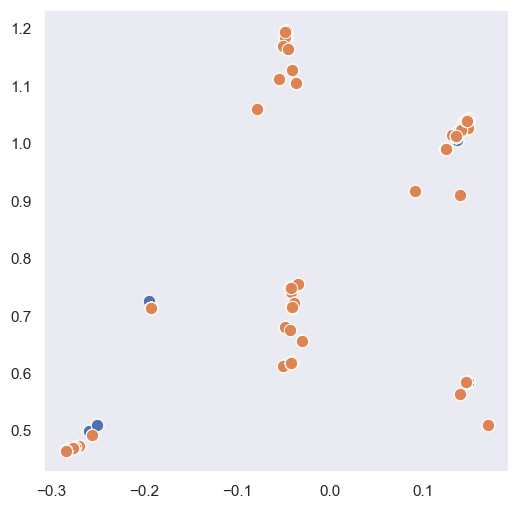

In [16]:
# visualize data
plt.figure(figsize=(6, 6))
sns.scatterplot(x=mca[:, 0], y=mca[:, 1], s=80)
sns.scatterplot(x=mca_s[:, 0], y=mca_s[:, 1], s=80);

#### Address Z

In [17]:
# generate the linkage matrix
Z = linkage(mca_s, 'average')

In [18]:
Z.shape

(10742, 4)

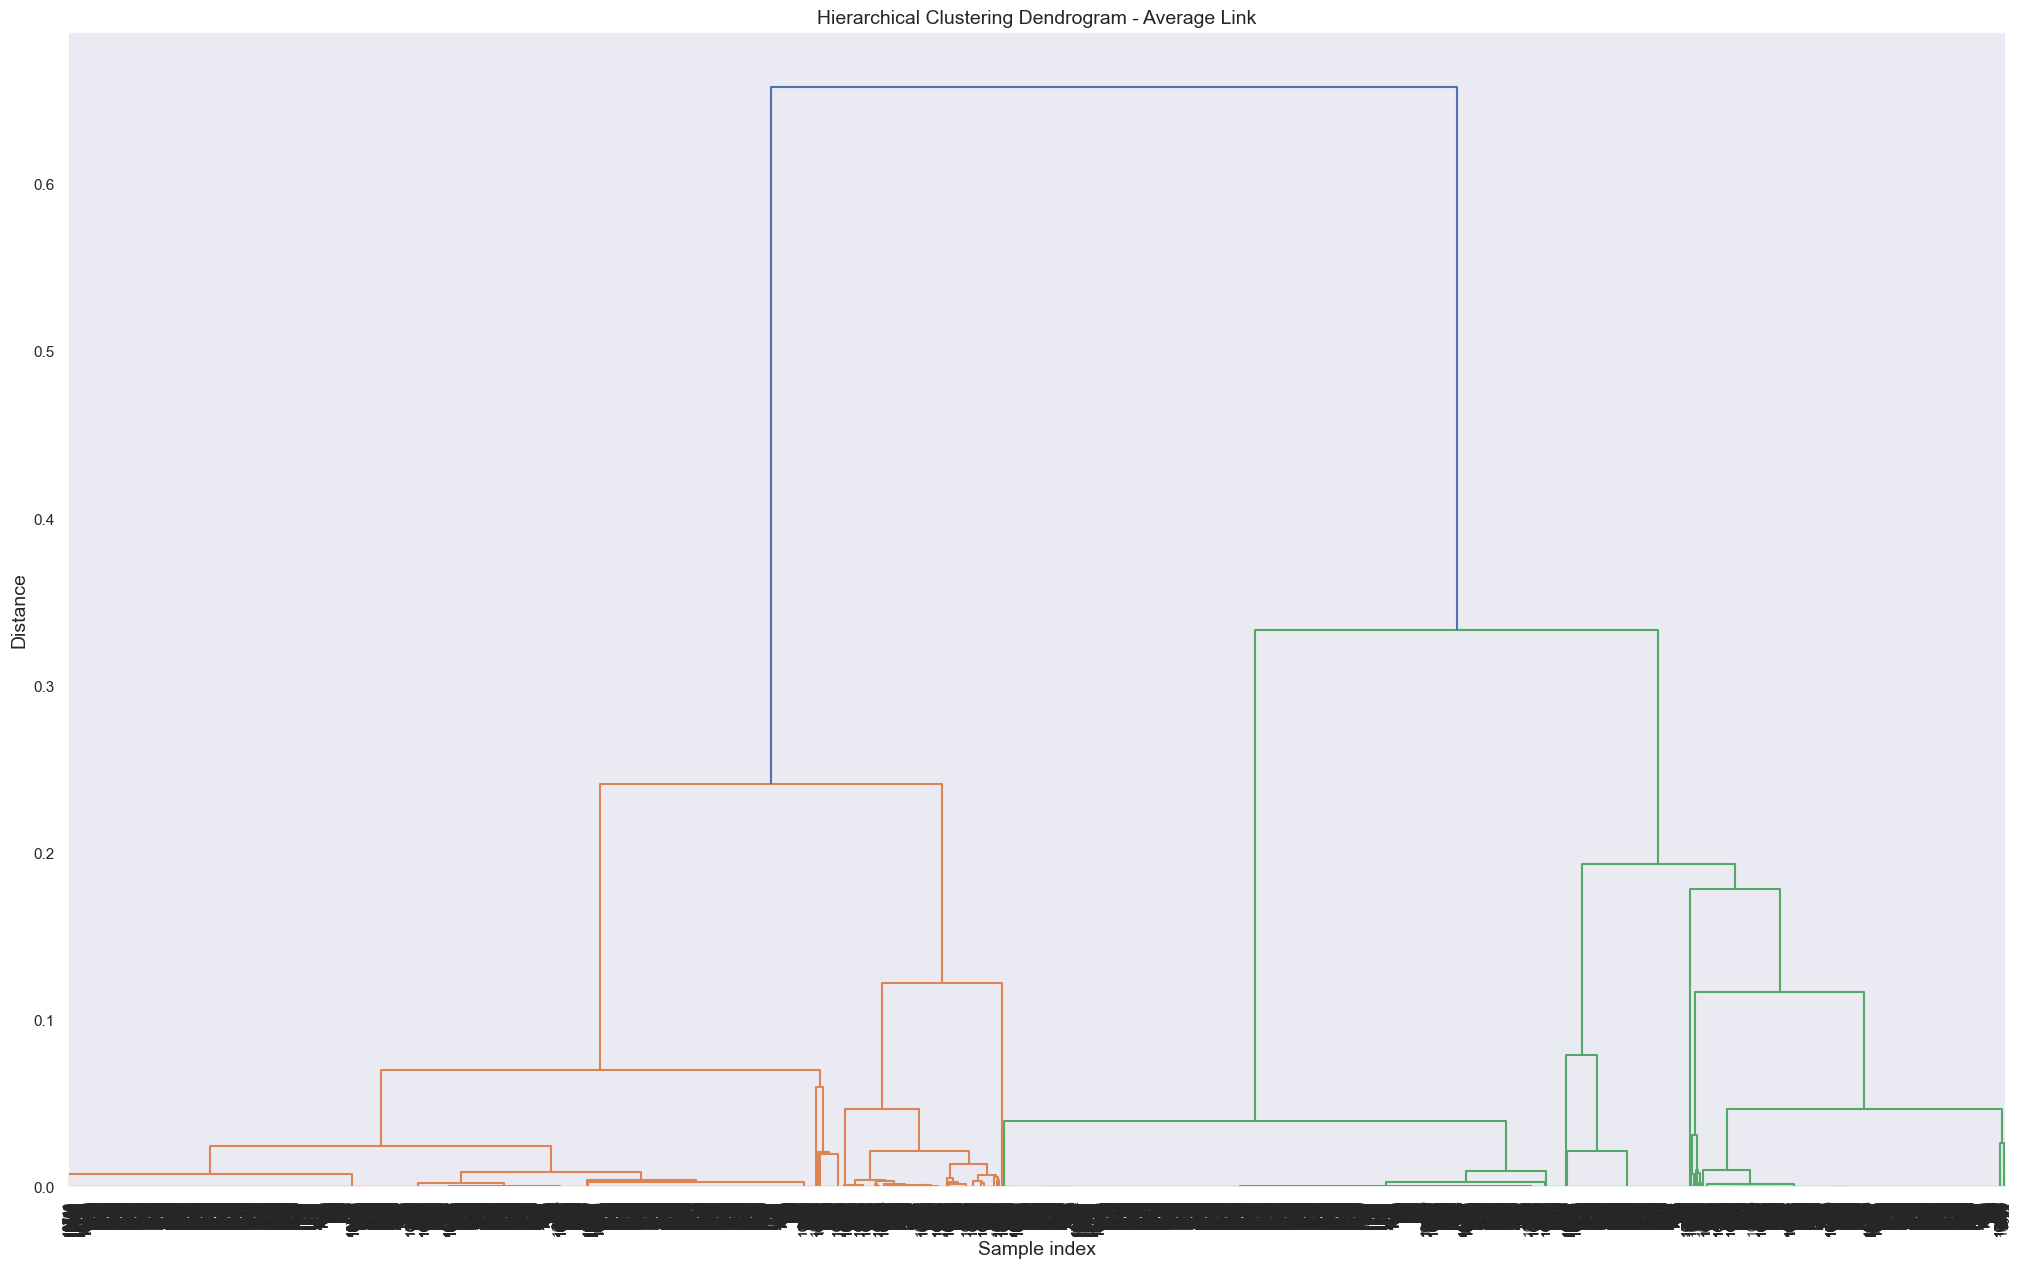

In [19]:
# plot dendrogram
plt.figure(figsize=(25, 15))

dendrogram(Z, leaf_rotation=90, leaf_font_size=9)

plt.title('Hierarchical Clustering Dendrogram - Average Link', fontsize=14)
plt.xlabel('Sample index', fontsize=14)
plt.ylabel('Distance', fontsize=14);

#### Appropriate Cutoff

In [20]:
# the last five merges
Z[-5:]

array([[1.48790000e+04, 2.14780000e+04, 1.78316089e-01, 1.75000000e+03],
       [2.14770000e+04, 2.14800000e+04, 1.93555901e-01, 2.44000000e+03],
       [2.14760000e+04, 2.14790000e+04, 2.41186286e-01, 5.18900000e+03],
       [2.14710000e+04, 2.14810000e+04, 3.33712847e-01, 5.55400000e+03],
       [2.14820000e+04, 2.14830000e+04, 6.58404294e-01, 1.07430000e+04]])

#### Visualize Truncated Dendrogram

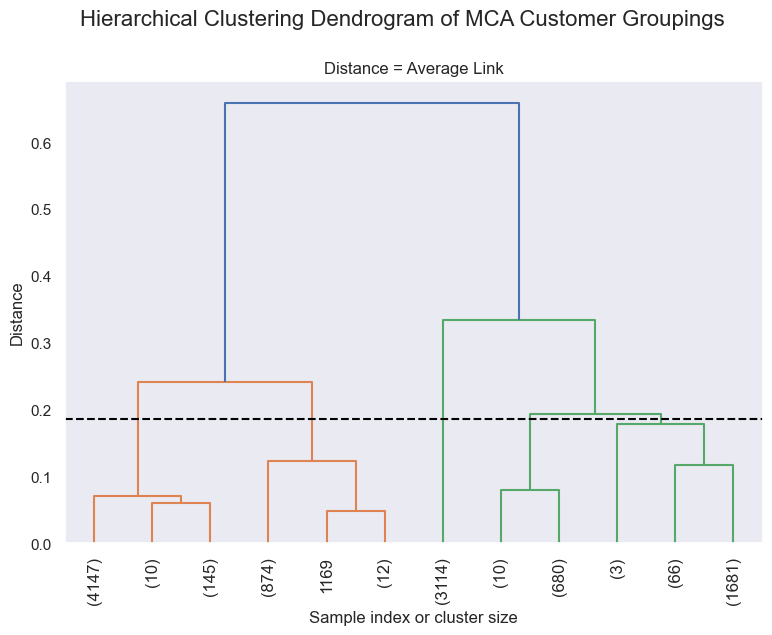

In [21]:
# truncated dendrogram
plt.figure(figsize=(9, 6))

# set cut-off to 50
max_d = .185  # max_d as in max_distance

dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last p merged clusters
           leaf_rotation=90,
           leaf_font_size=12)

plt.suptitle('Hierarchical Clustering Dendrogram of MCA Customer Groupings', fontsize=16, y=1)
plt.title('Distance = Average Link', fontsize=12)
plt.xlabel('Sample index or cluster size', fontsize=12)
plt.ylabel('Distance', fontsize=12)

plt.axhline(y=max_d, color='black', linestyle='--');

This cut-off value results in `five` "main" customer categories.

In [22]:
# retrieve cluster numbers (assignments) based on max_d
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([5, 1, 3, ..., 1, 1, 5], dtype=int32)

In [23]:
# alternatively, retrieve cluster numbers (assignments) based on k
k = 5
fcluster(Z, k, criterion='maxclust')

array([5, 1, 3, ..., 1, 1, 5], dtype=int32)

c:\Users\Ayana\anaconda3\envs\ferg\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


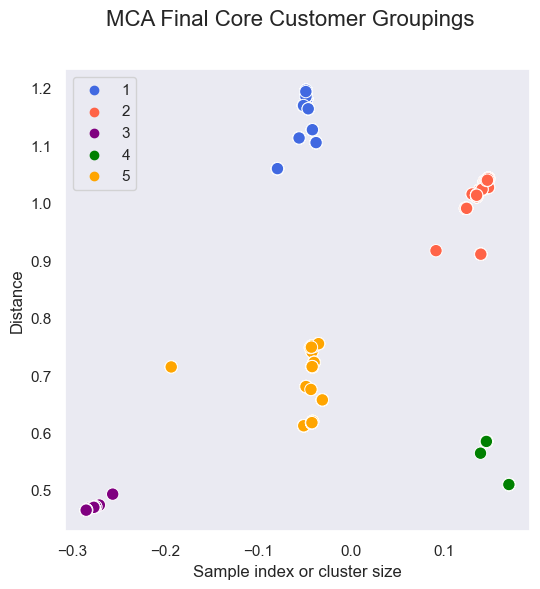

In [24]:
# visualize clusters
plt.figure(figsize=(6, 6))
sns.scatterplot(mca_s[:,0], mca_s[:,1], hue=clusters, s=80, legend=True,
                palette=['royalblue', 'tomato', 'purple', 'green', 'orange'])

plt.suptitle('MCA Final Core Customer Groupings', fontsize=16)
plt.xlabel('Sample index or cluster size', fontsize=12)
plt.ylabel('Distance', fontsize=12);

Collapse CUSTOMER_TYPE_ID into the four groups.

In [25]:
def MCAgroups(dat):
    if dat in ["M_COMMPLBG_SML"]:
        return "Multi_RESB_H_W_F_plus"
    elif dat in ["P_IRRAG", "P_SEPTIC"]:
        return "Nearest_RES_TRADE"
    elif dat in ["S_ENGINEERS"]:
        return "Nearest_COMMERCIAL"
    else:
        return dat

ex_sample['MCA'] = ex_sample['MCA'].apply(MCAgroups)
ex_sample['MCA'].value_counts(sort=True)

Multi_RESB_H_W_F_plus    10743
Name: MCA, dtype: int64

## ASSESS OPTIMAL CLUSTERS (*k*) - **<span style='color:blue '>ELBOW METHOD</span>**

Sanity check

In [26]:
ex_sample.dtypes

ORD_CHNL_ID          object
FFMT_CHNL_ID         object
BUSINESS_GROUP       object
MCA                  object
CUSTOMER_TYPE_ID     object
PRODUCT_REVENUE     float64
PROD_REV_bins        object
PROD_REV_Std        float64
COUNTER_FLAG         object
SHOWROOM_FLAG        object
REGION_NAME          object
LEVEL1               object
X_MCA_D1            float64
Y_MCA_D2            float64
MCA_GRP_ALL          object
dtype: object

In [27]:
#drop uneeded variables
dat = ex_sample
dat.drop(['CUSTOMER_TYPE_ID', 'PROD_REV_bins', 'PROD_REV_Std', 
          'X_MCA_D1', 'Y_MCA_D2', 'MCA_GRP_ALL', 'MCA'],
                axis = 1, inplace = True)
#dim after drop
print('Dimension data: {} rows and {} columns'.format(len(dat), len(dat.columns)))
dat.head(10)

Dimension data: 10743 rows and 8 columns


,ORD_CHNL_ID,FFMT_CHNL_ID,BUSINESS_GROUP,PRODUCT_REVENUE,COUNTER_FLAG,SHOWROOM_FLAG,REGION_NAME,LEVEL1
locROW,,,,,,,,
3671792,CTR,PKUP,Waterworks,14.00,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Waterworks,MRO AND CONSUMABLES
797473,SHWRM,EX-DIR,Residential Builder,1114.04,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended West,PLUMBING - FINISHED
1268014,CTR,PKUP,HVAC,98.60,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended West,PLUMBING - ROUGH
290939,SHWRM,PKUP,Residential Builder,41.58,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended East,PLUMBING - FINISHED
234380,SHWRM,DLVR,Residential Builder,142.16,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended East,WATER SYSTEMS
1378000,TRDL,DLVR,Industrial,1565.25,N_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended Central,"PIPE, VALVES AND FITTINGS"
3683129,TRDL,DLVR,Waterworks,20.96,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Waterworks,"PIPE, VALVES AND FITTINGS"
1180201,TRDL,DLVR,HVAC,153.15,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended East,"HEATING, VENTILATION AND AIR CONDITIONING"
3649243,TRDL,IN-DIR,Waterworks,2745.32,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Waterworks,WATER WORKS


In [28]:
# Check missing value
dat.isna().sum()

ORD_CHNL_ID        0
FFMT_CHNL_ID       0
BUSINESS_GROUP     0
PRODUCT_REVENUE    0
COUNTER_FLAG       0
SHOWROOM_FLAG      0
REGION_NAME        0
LEVEL1             0
dtype: int64

### Categorical Columns

In [29]:
#position of categorical columns
cat_cols = [dat.columns.get_loc(col) for col in list(dat.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(dat.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(cat_cols))

Categorical columns           : ['ORD_CHNL_ID', 'FFMT_CHNL_ID', 'BUSINESS_GROUP', 'COUNTER_FLAG', 'SHOWROOM_FLAG', 'REGION_NAME', 'LEVEL1']
Categorical columns position  : [0, 1, 2, 4, 5, 6, 7]


### Required Dataframe Matrix

In [30]:
# Convert dataframe to matrix for required structure
OpK_matrix = dat.to_numpy()
OpK_matrix

array([['CTR', 'PKUP', 'Waterworks', ..., 'N_SHOWROOM_FLAG',
        'Waterworks', 'MRO AND CONSUMABLES'],
       ['SHWRM', 'EX-DIR', 'Residential Builder', ..., 'Y_SHOWROOM_FLAG',
        'Blended West', 'PLUMBING - FINISHED'],
       ['CTR', 'PKUP', 'HVAC', ..., 'Y_SHOWROOM_FLAG', 'Blended West',
        'PLUMBING - ROUGH'],
       ...,
       ['SHWRM', 'DLVR', 'Residential Builder', ..., 'Y_SHOWROOM_FLAG',
        'Blended East', 'BUILDER'],
       ['CTR', 'PKUP', 'Residential Builder', ..., 'N_SHOWROOM_FLAG',
        'Blended Central', 'PLUMBING - ROUGH'],
       ['TRDL', 'DLVR', 'Waterworks', ..., 'N_SHOWROOM_FLAG',
        'Waterworks', 'PIPE, VALVES AND FITTINGS']], dtype=object)

In [31]:
# Choose optimal K using Elbow method
ad = []
for cluster in range(2, 13):
    try:
        kprototype = KPrototypes(n_jobs = 1, n_clusters = cluster, init = 'Huang', random_state = 314)
        kprototype.fit_predict(OpK_matrix, categorical = cat_cols)
        ad.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7


In [32]:
# Converting the results into a dataframe and plotting them
a = {'Cluster': range(1, 13), 'WSSE': ad}
dat = pd.DataFrame.from_dict(a, orient='index')
dat_ad = dat.transpose()
print(dat_ad)

    Cluster          WSSE
0       1.0  4.588478e+11
1       2.0  2.123193e+11
2       3.0  1.603778e+11
3       4.0  1.307120e+11
4       5.0  1.145947e+11
5       6.0  1.063092e+11
6       7.0           NaN
7       8.0           NaN
8       9.0           NaN
9      10.0           NaN
10     11.0           NaN
11     12.0           NaN


### Visualize

c:\Users\Ayana\anaconda3\envs\ferg\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 6 rows containing missing values.
c:\Users\Ayana\anaconda3\envs\ferg\lib\site-packages\plotnine\layer.py:412: PlotnineWarning: geom_point : Removed 6 rows containing missing values.
c:\Users\Ayana\anaconda3\envs\ferg\lib\site-packages\plotnine\layer.py:412: PlotnineWarning: geom_label : Removed 6 rows containing missing values.


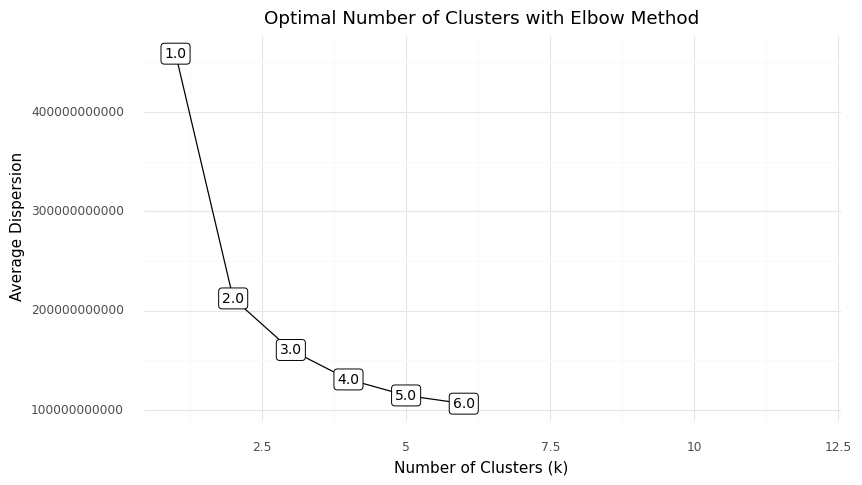

<ggplot: (102408199431)>

In [33]:
# Data viz
plotnine.options.figure_size = (9, 5)
(   
    ggplot(data = dat_ad)+
    geom_line(aes(x = 'Cluster',
                  y = 'WSSE'))+
    geom_point(aes(x = 'Cluster',
                   y = 'WSSE'))+
    geom_label(aes(x = 'Cluster',
                   y = 'WSSE',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal Number of Clusters with Elbow Method')+
    xlab('Number of Clusters (k)')+
    ylab('Average Dispersion')+
    theme_minimal()
)

Using the `elbow method` and appropriate cutoff for k is 2 clusters for a k-prototype model. The dendrogram supports this as well.

In [34]:
# Fit the clusters
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 314)
kprototype.fit_predict(OpK_matrix, categorical = cat_cols)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [35]:
# Cluster centorid
kprototype.cluster_centroids_
# Check the iteration of the clusters created
kprototype.n_iter_
# Check the cost of the clusters created
kprototype.cost_

212319289019.03766

In [36]:
# Add the cluster to the dataframe
ex_sample['Cluster Labels'] = kprototype.labels_
ex_sample['Segment'] = ex_sample['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
ex_sample['Segment'] = ex_sample['Segment'].astype('category')
ex_sample['Segment'] = ex_sample['Segment'].cat.reorder_categories(['First','Second', 'Third'])

In [37]:
ex_sample.head()

,ORD_CHNL_ID,FFMT_CHNL_ID,BUSINESS_GROUP,PRODUCT_REVENUE,COUNTER_FLAG,SHOWROOM_FLAG,REGION_NAME,LEVEL1,Cluster Labels,Segment
locROW,,,,,,,,,,
3671792,CTR,PKUP,Waterworks,14.00,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Waterworks,MRO AND CONSUMABLES,1,Second
797473,SHWRM,EX-DIR,Residential Builder,1114.04,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended West,PLUMBING - FINISHED,1,Second
1268014,CTR,PKUP,HVAC,98.60,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended West,PLUMBING - ROUGH,1,Second
290939,SHWRM,PKUP,Residential Builder,41.58,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended East,PLUMBING - FINISHED,1,Second
234380,SHWRM,DLVR,Residential Builder,142.16,Y_COUNTER_FLAG,Y_SHOWROOM_FLAG,Blended East,WATER SYSTEMS,1,Second


In [38]:
ex_sample.dtypes

ORD_CHNL_ID          object
FFMT_CHNL_ID         object
BUSINESS_GROUP       object
PRODUCT_REVENUE     float64
COUNTER_FLAG         object
SHOWROOM_FLAG        object
REGION_NAME          object
LEVEL1               object
Cluster Labels       uint16
Segment            category
dtype: object

In [39]:
interpret = ex_sample

# Cluster interpretation
interpret.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
interpret.groupby('Segment').agg(
    {
        'Total':'count',
        'ORD_CHNL_ID': lambda x: x.value_counts().index[0],
        'FFMT_CHNL_ID': lambda x: x.value_counts().index[0],
        'LEVEL1': lambda x: x.value_counts().index[0],
        'BUSINESS_GROUP': lambda x: x.value_counts().index[0],
        'COUNTER_FLAG': lambda x: x.value_counts().index[0],
        'SHOWROOM_FLAG': lambda x: x.value_counts().index[0],
        'REGION_NAME': lambda x: x.value_counts().index[0],
        'PRODUCT_REVENUE': 'median'
    }
).reset_index()

,Segment,Total,ORD_CHNL_ID,FFMT_CHNL_ID,LEVEL1,BUSINESS_GROUP,COUNTER_FLAG,SHOWROOM_FLAG,REGION_NAME,PRODUCT_REVENUE
0,First,13,TRDL,EX-DIR,"PIPE, VALVES AND FITTINGS",Waterworks,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Waterworks,121493.830
1,Second,10728,CTR,PKUP,"PIPE, VALVES AND FITTINGS",Residential Builder,Y_COUNTER_FLAG,N_SHOWROOM_FLAG,Blended East,110.000
2,Third,2,ECOMM,DLVR,BUILDER,Other,N_COUNTER_FLAG,N_SHOWROOM_FLAG,Ebusiness,612482.235


The analysis thus far has proven that Example has done an overall great job in grouping customers at the business group level. We have introduced subcategories that can be used in lieu of business group.  
Exploring possible clusters within groups is also of interest. 